In [ ]:
import tensorflow as tf
import sklearn

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


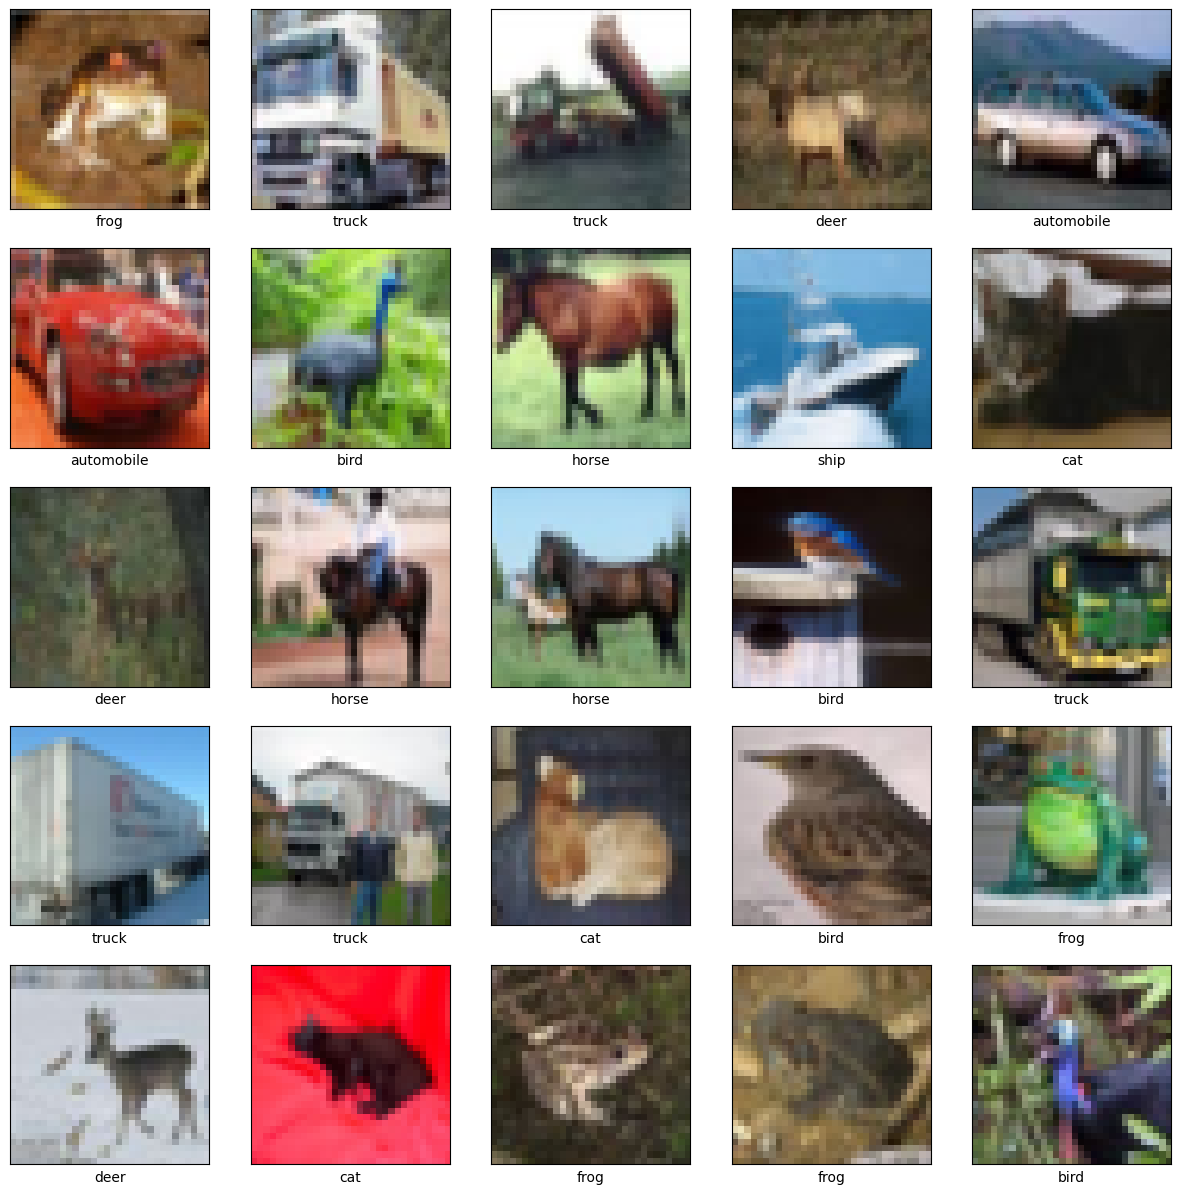

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Data Preprocessing

In [ ]:
# Normalize values of train_images from -0.5 to 0.5
train_images -= 0.5
print(train_images.max())
print(train_images.min())

0.5
-0.5


In [ ]:
# Normalize values of test_images from -0.5 to 0.5
test_images -= 0.5
print(test_images.max())
print(test_images.min())

0.5
-0.5


In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels, num_classes = 10)

In [ ]:
y_test = tf.keras.utils.to_categorical(test_labels, num_classes = 10)

## Build the Model

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(24, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 24)        1824      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 48)        10416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 48)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 96)          41568     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 96)         

## Default training

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 6s 6ms/step - loss: 2.2993 - recall_3: 0.0000e+00 - val_loss: 2.2955 - val_recall_3: 0.0000e+00
Epoch 2/300
782/782 [==============================] - 5s 6ms/step - loss: 2.2915 - recall_3: 0.0000e+00 - val_loss: 2.2865 - val_recall_3: 0.0000e+00
Epoch 3/300
782/782 [==============================] - 4s 6ms/step - loss: 2.2812 - recall_3: 0.0000e+00 - val_loss: 2.2737 - val_recall_3: 0.0000e+00
Epoch 4/300
782/782 [==============================] - 5s 6ms/step - loss: 2.2656 - recall_3: 0.0000e+00 - val_loss: 2.2538 - val_recall_3: 0.0000e+00
Epoch 5/300
782/782 [==============================] - 5s 6ms/step - loss: 2.2425 - recall_3: 0.0000e+00 - val_loss: 2.2257 - val_recall_3: 0.0000e+00
Epoch 6/300
782/782 [==============================] - 4s 6ms/step - loss: 2.2115 - recall_3: 0.0000e+00 - val_loss: 2.1898 - val_recall_3: 0.0000e+00
Epoch 7/300
782/782 [==============================] - 5s 6ms/step - loss: 2.1725 - recall_3: 

**Test recall:** 0.6262

## Modify the network structure

### Number of filters

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 8s 9ms/step - loss: 2.2976 - recall_4: 0.0000e+00 - val_loss: 2.2922 - val_recall_4: 0.0000e+00
Epoch 2/300
782/782 [==============================] - 6s 8ms/step - loss: 2.2860 - recall_4: 0.0000e+00 - val_loss: 2.2790 - val_recall_4: 0.0000e+00
Epoch 3/300
782/782 [==============================] - 5s 7ms/step - loss: 2.2698 - recall_4: 0.0000e+00 - val_loss: 2.2581 - val_recall_4: 0.0000e+00
Epoch 4/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2425 - recall_4: 0.0000e+00 - val_loss: 2.2217 - val_recall_4: 0.0000e+00
Epoch 5/300
782/782 [==============================] - 5s 7ms/step - loss: 2.1971 - recall_4: 0.0000e+00 - val_loss: 2.1647 - val_recall_4: 0.0000e+00
Epoch 6/300
782/782 [==============================] - 7s 8ms/step - loss: 2.1365 - recall_4: 0.0000e+00 - val_loss: 2.0995 - val_recall_4: 0.0000e+00
Epoch 7/300
782/782 [==============================] - 5s 7ms/step - loss: 2.0750 - recall_4: 

The recall of test set increases when we increase the number of filters. We will proceed with these extra filters.

**Test recall:** 0.6564

### Number of Layers

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
# new layer
model.add(layers.Dense(128, activation='relu'))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 7s 8ms/step - loss: 2.2977 - recall_5: 0.0000e+00 - val_loss: 2.2916 - val_recall_5: 0.0000e+00
Epoch 2/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2856 - recall_5: 0.0000e+00 - val_loss: 2.2782 - val_recall_5: 0.0000e+00
Epoch 3/300
782/782 [==============================] - 5s 7ms/step - loss: 2.2679 - recall_5: 0.0000e+00 - val_loss: 2.2539 - val_recall_5: 0.0000e+00
Epoch 4/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2310 - recall_5: 0.0000e+00 - val_loss: 2.2000 - val_recall_5: 0.0000e+00
Epoch 5/300
782/782 [==============================] - 5s 7ms/step - loss: 2.1538 - recall_5: 0.0000e+00 - val_loss: 2.0997 - val_recall_5: 0.0000e+00
Epoch 6/300
782/782 [==============================] - 5s 7ms/step - loss: 2.0569 - recall_5: 0.0000e+00 - val_loss: 2.0172 - val_recall_5: 0.0000e+00
Epoch 7/300
782/782 [==============================] - 5s 7ms/step - loss: 1.9980 - recall_5: 

When we increased the number of layers, the training recall is very high but the test recall has decreased. It seems like our model has overfitted the data, so we won't use this extra layer.

**Test recall:** 0.6347

### Filter size

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (7, 7), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 8s 8ms/step - loss: 2.3003 - recall_6: 0.0000e+00 - val_loss: 2.2957 - val_recall_6: 0.0000e+00
Epoch 2/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2903 - recall_6: 0.0000e+00 - val_loss: 2.2843 - val_recall_6: 0.0000e+00
Epoch 3/300
782/782 [==============================] - 5s 7ms/step - loss: 2.2747 - recall_6: 0.0000e+00 - val_loss: 2.2628 - val_recall_6: 0.0000e+00
Epoch 4/300
782/782 [==============================] - 6s 8ms/step - loss: 2.2432 - recall_6: 0.0000e+00 - val_loss: 2.2173 - val_recall_6: 0.0000e+00
Epoch 5/300
782/782 [==============================] - 5s 7ms/step - loss: 2.1782 - recall_6: 0.0000e+00 - val_loss: 2.1333 - val_recall_6: 0.0000e+00
Epoch 6/300
782/782 [==============================] - 6s 7ms/step - loss: 2.0965 - recall_6: 0.0000e+00 - val_loss: 2.0634 - val_recall_6: 0.0000e+00
Epoch 7/300
782/782 [==============================] - 6s 7ms/step - loss: 2.0484 - recall_6: 

Higher filter size didn't increase the performance.

**Test recall:** 0.6050

### Leaky ReLU

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (5, 5), input_shape=(32, 32, 3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.LeakyReLU())
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 8s 8ms/step - loss: 2.2996 - recall_7: 0.0000e+00 - val_loss: 2.2937 - val_recall_7: 0.0000e+00
Epoch 2/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2885 - recall_7: 0.0000e+00 - val_loss: 2.2826 - val_recall_7: 0.0000e+00
Epoch 3/300
782/782 [==============================] - 5s 7ms/step - loss: 2.2746 - recall_7: 0.0000e+00 - val_loss: 2.2647 - val_recall_7: 0.0000e+00
Epoch 4/300
782/782 [==============================] - 6s 8ms/step - loss: 2.2491 - recall_7: 0.0000e+00 - val_loss: 2.2290 - val_recall_7: 0.0000e+00
Epoch 5/300
782/782 [==============================] - 5s 7ms/step - loss: 2.1961 - recall_7: 0.0000e+00 - val_loss: 2.1550 - val_recall_7: 0.0000e+00
Epoch 6/300
782/782 [==============================] - 6s 8ms/step - loss: 2.1058 - recall_7: 0.0000e+00 - val_loss: 2.0571 - val_recall_7: 0.0000e+00
Epoch 7/300
782/782 [==============================] - 6s 7ms/step - loss: 2.0275 - recall_7: 

Leaky ReLU decreased the test recall, so we will proceed with ReLU.

**Test recall:** 0.6227

### Dropout

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
# add dropout layer
model.add(layers.Dropout(0.3))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 16s 9ms/step - loss: 2.2988 - recall: 0.0000e+00 - val_loss: 2.2940 - val_recall: 0.0000e+00
Epoch 2/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2895 - recall: 0.0000e+00 - val_loss: 2.2836 - val_recall: 0.0000e+00
Epoch 3/300
782/782 [==============================] - 6s 7ms/step - loss: 2.2777 - recall: 0.0000e+00 - val_loss: 2.2693 - val_recall: 0.0000e+00
Epoch 4/300
782/782 [==============================] - 5s 7ms/step - loss: 2.2599 - recall: 0.0000e+00 - val_loss: 2.2458 - val_recall: 0.0000e+00
Epoch 5/300
782/782 [==============================] - 7s 9ms/step - loss: 2.2291 - recall: 0.0000e+00 - val_loss: 2.2053 - val_recall: 0.0000e+00
Epoch 6/300
782/782 [==============================] - 5s 7ms/step - loss: 2.1818 - recall: 0.0000e+00 - val_loss: 2.1454 - val_recall: 0.0000e+00
Epoch 7/300
782/782 [==============================] - 7s 9ms/step - loss: 2.1237 - recall: 0.0000e+00 - val_loss: 2.

Using dropout layer has increased the recall. We will keep this layer in our further models.

**Test recall:** 0.6605

### Batch Normalization Layer

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
## will it be faster if we put batch norm after pooling?
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
# dropout layer
model.add(layers.Dropout(0.3))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 8s 9ms/step - loss: 1.9987 - recall_1: 0.2288 - val_loss: 1.4995 - val_recall_1: 0.3051
Epoch 2/300
782/782 [==============================] - 6s 8ms/step - loss: 1.5817 - recall_1: 0.3416 - val_loss: 1.3464 - val_recall_1: 0.3900
Epoch 3/300
782/782 [==============================] - 7s 9ms/step - loss: 1.4126 - recall_1: 0.3982 - val_loss: 1.2590 - val_recall_1: 0.4328
Epoch 4/300
782/782 [==============================] - 7s 9ms/step - loss: 1.2976 - recall_1: 0.4398 - val_loss: 1.2201 - val_recall_1: 0.4523
Epoch 5/300
782/782 [==============================] - 7s 9ms/step - loss: 1.2060 - recall_1: 0.4734 - val_loss: 1.1717 - val_recall_1: 0.4778
Epoch 6/300
782/782 [==============================] - 6s 8ms/step - loss: 1.1438 - recall_1: 0.4961 - val_loss: 1.1690 - val_recall_1: 0.4880
Epoch 7/300
782/782 [==============================] - 7s 8ms/step - loss: 1.0811 - recall_1: 0.5217 - val_loss: 1.1024 - val_recall_1: 0.5063

We will include Batch Normalization Layer in our further models.

**Test recall:** 0.6962

### Final network structure

In [ ]:
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))

model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
# fully conn layer 1
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
# dropout layer
model.add(layers.Dropout(0.3))
# fully conn layer 2
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_5 (Bat  (None, 12, 12, 128)       512       
 chNormalization)                                                
                                                      

## Training Settings

### Batch size

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=256,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
196/196 [==============================] - 18s 25ms/step - loss: 2.4185 - recall: 0.1401 - val_loss: 2.5552 - val_recall: 0.0000e+00
Epoch 2/300
196/196 [==============================] - 4s 20ms/step - loss: 1.9378 - recall: 0.2396 - val_loss: 2.3343 - val_recall: 0.0494
Epoch 3/300
196/196 [==============================] - 4s 19ms/step - loss: 1.7562 - recall: 0.2911 - val_loss: 1.6266 - val_recall: 0.2204
Epoch 4/300
196/196 [==============================] - 4s 19ms/step - loss: 1.6517 - recall: 0.3205 - val_loss: 1.4545 - val_recall: 0.3283
Epoch 5/300
196/196 [==============================] - 4s 19ms/step - loss: 1.5655 - recall: 0.3485 - val_loss: 1.4086 - val_recall: 0.3647
Epoch 6/300
196/196 [==============================] - 4s 20ms/step - loss: 1.5035 - recall: 0.3692 - val_loss: 1.3724 - val_recall: 0.3840
Epoch 7/300
196/196 [==============================] - 4s 19ms/step - loss: 1.4413 - recall: 0.3903 - val_loss: 1.3367 - val_recall: 0.3971
Epoch 8/300
196

### Learning Rate

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=False, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 10s 10ms/step - loss: 1.5842 - recall_1: 0.3831 - val_loss: 1.9531 - val_recall_1: 0.3861
Epoch 2/300
782/782 [==============================] - 7s 8ms/step - loss: 1.0375 - recall_1: 0.5506 - val_loss: 1.0277 - val_recall_1: 0.5812
Epoch 3/300
782/782 [==============================] - 7s 9ms/step - loss: 0.8256 - recall_1: 0.6435 - val_loss: 1.0007 - val_recall_1: 0.6115
Epoch 4/300
782/782 [==============================] - 7s 8ms/step - loss: 0.6760 - recall_1: 0.7099 - val_loss: 1.0011 - val_recall_1: 0.6395
Epoch 5/300
782/782 [==============================] - 7s 9ms/step - loss: 0.5569 - recall_1: 0.7630 - val_loss: 0.9995 - val_recall_1: 0.6571
Epoch 6/300
782/782 [==============================] - 7s 9ms/step - loss: 0.4587 - recall_1: 0.8060 - val_loss: 1.3254 - val_recall_1: 0.6211
Epoch 7/300
782/782 [==============================] - 6s 8ms/step - loss: 0.3602 - recall_1: 0.8479 - val_loss: 0.8784 - val_recall_1: 0.72

### Data shuffle

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

result = model.fit(train_images, y_train, epochs=300, batch_size=64,
                   shuffle=True, validation_data=(test_images, y_test))

Epoch 1/300
782/782 [==============================] - 15s 17ms/step - loss: 1.5443 - recall_4: 0.3681 - val_loss: 2.0958 - val_recall_4: 0.3729
Epoch 2/300
782/782 [==============================] - 7s 8ms/step - loss: 1.0605 - recall_4: 0.5440 - val_loss: 1.0569 - val_recall_4: 0.5648
Epoch 3/300
782/782 [==============================] - 7s 9ms/step - loss: 0.8692 - recall_4: 0.6285 - val_loss: 2.3406 - val_recall_4: 0.3900
Epoch 4/300
782/782 [==============================] - 7s 9ms/step - loss: 0.7327 - recall_4: 0.6853 - val_loss: 0.9274 - val_recall_4: 0.6389
Epoch 5/300
782/782 [==============================] - 7s 9ms/step - loss: 0.6219 - recall_4: 0.7339 - val_loss: 0.8779 - val_recall_4: 0.6573
Epoch 6/300
782/782 [==============================] - 8s 10ms/step - loss: 0.5261 - recall_4: 0.7798 - val_loss: 1.0652 - val_recall_4: 0.6340
Epoch 7/300
782/782 [==============================] - 7s 9ms/step - loss: 0.4483 - recall_4: 0.8118 - val_loss: 2.1936 - val_recall_4: 0.5